# Admissions Data

Codacademy Exercise: Deep Learning Regression

Predict graduate school admission probability using a neural network to perform regression.

In [10]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [11]:
# load the dataset into a pandas DataFrame
dataset = pd.read_csv('admissions_data.csv')

# print the first five entries in the dataset and the summary stats
print(dataset.head(5))
print(dataset.describe())

   Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR  CGPA  \
0           1        337          118                  4  4.5  4.5  9.65   
1           2        324          107                  4  4.0  4.5  8.87   
2           3        316          104                  3  3.0  3.5  8.00   
3           4        322          110                  3  3.5  2.5  8.67   
4           5        314          103                  2  2.0  3.0  8.21   

   Research  Chance of Admit  
0         1             0.92  
1         1             0.76  
2         1             0.72  
3         1             0.80  
4         0             0.65  
       Serial No.   GRE Score  TOEFL Score  University Rating         SOP  \
count  500.000000  500.000000   500.000000         500.000000  500.000000   
mean   250.500000  316.472000   107.192000           3.114000    3.374000   
std    144.481833   11.295148     6.081868           1.143512    0.991004   
min      1.000000  290.000000    92.000000       

In [12]:
# remove the serial number column from the dataset
dataset = dataset.drop(['Serial No.'], axis=1)

# split the data into labels and features
labels = dataset.iloc[:, -1] # select the last column
features = dataset.iloc[:, 0:-1] # select all columns except the last

# split the data into a training set and a test set
# common sizes for a test set range between 0.20 and 0.35
features_train, features_test, labels_train_set, labels_test_set = train_test_split(features, labels, test_size=0.20, random_state=42)

# standardize the numerical features
numerical_features = features.select_dtypes(include=['float64', 'int64'])
numerical_columns = numerical_features.columns
ct = ColumnTransformer([('only numeric', StandardScaler(), numerical_columns)], remainder='passthrough')
features_train_scale = ct.fit_transform(features_train)
features_test_scale = ct.transform(features_test)

In [13]:
# build the model
num_features = features.shape[1]
my_model = Sequential()
my_model.add(InputLayer(input_shape=(num_features)))
my_model.add(Dense(16, activation = 'relu')) # hidden layer
my_model.add(Dropout(0.1))
my_model.add(Dense(8, activation = 'relu')) # hidden layer
my_model.add(Dropout(0.2))
my_model.add(Dense(1)) # output layer
print(my_model.summary())

# initialize the gradient descent optimizer
opt = Adam(learning_rate=0.005)

# compile the model
# using mean-squared error as the loss function and mean average error as the metric
my_model.compile(loss = 'mse', metrics = ['mae'], optimizer = opt)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                128       
                                                                 
 dropout_2 (Dropout)         (None, 16)                0         
                                                                 
 dense_4 (Dense)             (None, 8)                 136       
                                                                 
 dropout_3 (Dropout)         (None, 8)                 0         
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 273 (1.07 KB)
Trainable params: 273 (1.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [14]:
# train the model
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20) # early stopping
history = my_model.fit(features_train_scale, labels_train_set, epochs=100, batch_size=8, verbose=1, validation_split=0.25, callbacks=[es])

Epoch 1/100
38/38 [==============================] - 13s 162ms/step - loss: 0.4645 - mae: 0.5384 - val_loss: 0.0888 - val_mae: 0.2501
Epoch 2/100
38/38 [==============================] - 0s 11ms/step - loss: 0.1097 - mae: 0.2731 - val_loss: 0.0391 - val_mae: 0.1668
Epoch 3/100
38/38 [==============================] - 0s 9ms/step - loss: 0.0531 - mae: 0.1903 - val_loss: 0.0206 - val_mae: 0.1192
Epoch 4/100
38/38 [==============================] - 6s 157ms/step - loss: 0.0374 - mae: 0.1568 - val_loss: 0.0147 - val_mae: 0.1020
Epoch 5/100
38/38 [==============================] - 0s 12ms/step - loss: 0.0309 - mae: 0.1430 - val_loss: 0.0099 - val_mae: 0.0797
Epoch 6/100
38/38 [==============================] - 1s 13ms/step - loss: 0.0241 - mae: 0.1232 - val_loss: 0.0100 - val_mae: 0.0856
Epoch 7/100
38/38 [==============================] - 6s 164ms/step - loss: 0.0186 - mae: 0.1107 - val_loss: 0.0081 - val_mae: 0.0743
Epoch 8/100
38/38 [==============================] - 6s 169ms/step - loss

In [15]:
# evaluate the trained model with the test set
val_mse, val_mae = my_model.evaluate(features_test_scale, labels_test_set, verbose=1)
print('MAE: ', val_mae)

4/4 [==============================] - 0s 5ms/step - loss: 0.0048 - mae: 0.0517
MAE:  0.05169524624943733


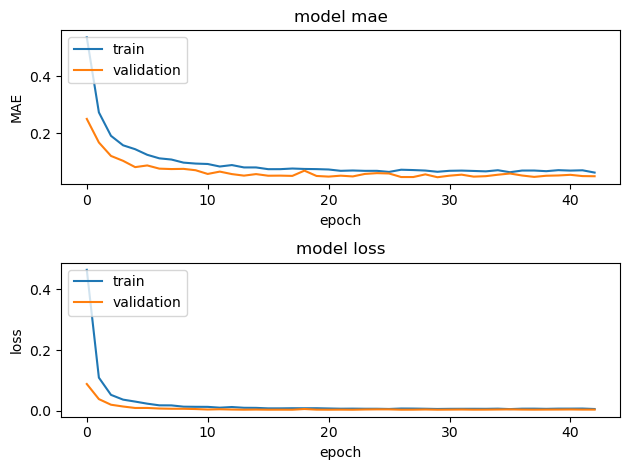

In [16]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax1 = fig.add_subplot(2, 1, 1)
ax1.plot(history.history['mae'])
ax1.plot(history.history['val_mae'])
ax1.set_title('model mae')
ax1.set_ylabel('MAE')
ax1.set_xlabel('epoch')
ax1.legend(['train', 'validation'], loc='upper left')

# Plot loss and val_loss over each epoch
ax2 = fig.add_subplot(2, 1, 2)
ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set_title('model loss')
ax2.set_ylabel('loss')
ax2.set_xlabel('epoch')
ax2.legend(['train', 'validation'], loc='upper left')

# used to keep plots from overlapping each other
fig.tight_layout()